In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime

In [62]:
ride_columns = ['accepted_driver_id', 'created_at', 'passenger_id', 'source_lat',
       'source_lng', 'destination_lat', 'destination_lng', 'eta', 'provider',
       'ata', 'id', 'city']

khatkesh_columns = ['ride_id','driver_id','a_t_a_result.arrival_a_t_a','a_t_a_result.boarding_a_t_a','a_t_a_result.ride_a_t_a','a_t_a_result.arrival_probe_result.probe.point.lat','a_t_a_result.arrival_probe_result.probe.point.lon','a_t_a_result.arrival_probe_result.probe.timestamp','a_t_a_result.arrival_probe_result.confidence','a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level','a_t_a_result.boarding_probe_result.probe.point.lat','a_t_a_result.boarding_probe_result.probe.point.lon','a_t_a_result.boarding_probe_result.probe.timestamp','a_t_a_result.boarding_probe_result.confidence','a_t_a_result.boarding_probe_result.h3_index','a_t_a_result.boarding_probe_result.k_ring_level','a_t_a_result.final_destination_probe_result.probe.point.lat','a_t_a_result.final_destination_probe_result.probe.point.lon','a_t_a_result.final_destination_probe_result.probe.timestamp','a_t_a_result.final_destination_probe_result.confidence','a_t_a_result.final_destination_probe_result.h3_index','a_t_a_result.final_destination_probe_result.k_ring_level','a_t_a_result.destination_probe_result.probe.point.lat','a_t_a_result.destination_probe_result.probe.point.lon','a_t_a_result.destination_probe_result.probe.timestamp','a_t_a_result.destination_probe_result.confidence','a_t_a_result.destination_probe_result.h3_index','a_t_a_result.destination_probe_result.k_ring_level','a_t_a_result.extra_destination_probe_result.probe.point.lat','a_t_a_result.extra_destination_probe_result.probe.point.lon','a_t_a_result.extra_destination_probe_result.probe.timestamp','a_t_a_result.extra_destination_probe_result.confidence','a_t_a_result.extra_destination_probe_result.h3_index','a_t_a_result.extra_destination_probe_result.k_ring_level','pickup_a_d_d_result.distance','pickup_a_d_d_result.confidence','pickup_a_d_d_result.route_ratio','pickup_a_d_d_result.g_p_s_ratio','ride_a_d_d_result.distance','ride_a_d_d_result.confidence','ride_a_d_d_result.route_ratio','ride_a_d_d_result.g_p_s_ratio','total_a_d_d_confidence','in_ride_allotment','e_d_d','clickhouse_time','hash']


In [63]:
rides = pd.read_csv("../rides_oct_04.csv", names=ride_columns)
rides.rename(columns={'id': 'ride_id'}, inplace=True)
rides.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city
count,1.596830e+05,1.596830e+05,159683.000000,159683.000000,159683.000000,159683.000000,159683.000000,159683.000000,1.596830e+05,159683.0
mean,1.868788e+06,2.278562e+07,35.698257,51.403706,35.699582,51.395934,1087.637720,1450.095439,5.057335e+09,1.0
std,1.445439e+06,1.803592e+07,0.090250,0.134872,0.092109,0.147025,815.242177,1435.581328,1.639342e+06,0.0
min,1.700000e+01,7.300000e+01,35.206379,50.900906,32.704700,49.693703,5.000000,120.000000,5.054181e+09,1.0
25%,4.257585e+05,4.296193e+06,35.671185,51.337521,35.672188,51.333807,493.000000,536.000000,5.055863e+09,1.0
50%,1.717339e+06,2.221839e+07,35.723324,51.407818,35.723465,51.406910,865.000000,1004.000000,5.057867e+09,1.0
75%,3.169017e+06,3.718564e+07,35.755314,51.464214,35.755663,51.463354,1451.000000,1840.000000,5.058542e+09,1.0
max,4.406427e+06,5.802538e+07,35.838417,52.796253,37.119347,54.964043,15176.000000,33442.000000,5.060301e+09,1.0


In [64]:
khatkesh = pd.read_csv("../khatkesh_oct_04.csv", names=khatkesh_columns)
khatkesh.describe()

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.k_ring_level,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,...,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06,2.618660e+06
mean,5.056956e+09,2.304882e+06,1.825271e+02,1.245440e+16,4.551262e+07,3.461026e+01,5.201785e+01,2.063995e+15,7.529954e-01,1.078977e+00,...,3.827068e-04,1.541872e-02,1.482863e+01,8.681529e-01,1.422473e-04,7.432016e-01,8.774527e-01,3.985876e-02,9.016624e+00,9.230223e+18
std,1.934576e+06,1.388276e+06,1.455708e+02,4.791536e+17,1.703405e+09,2.485676e+00,3.399691e+00,1.951146e+17,3.303889e-01,1.398187e+00,...,1.770072e-02,1.751480e-02,2.739082e+01,1.872764e-01,5.702591e-03,3.420945e-01,1.761965e-01,5.874980e-01,1.255118e+01,5.326241e+18
min,4.909169e+09,1.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.527766e+01,4.483287e+01,1.664541e+09,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.117813e+13
25%,5.055321e+09,1.056697e+06,8.900000e+01,8.000000e+00,4.150000e+02,3.271202e+01,5.090458e+01,1.664864e+09,7.692308e-01,0.000000e+00,...,0.000000e+00,5.988024e-03,4.984000e+00,7.800452e-01,0.000000e+00,5.573770e-01,8.131230e-01,0.000000e+00,2.972000e+00,4.616146e+18
50%,5.056470e+09,2.316600e+06,1.630000e+02,3.600000e+01,7.130000e+02,3.570702e+01,5.141611e+01,1.664875e+09,7.692308e-01,1.000000e+00,...,0.000000e+00,1.176471e-02,9.536000e+00,9.743628e-01,0.000000e+00,9.352518e-01,9.710467e-01,0.000000e+00,5.655000e+00,9.234145e+18
75%,5.059059e+09,3.579686e+06,2.510000e+02,1.210000e+02,1.213000e+03,3.618736e+01,5.250969e+01,1.664897e+09,1.000000e+00,1.000000e+00,...,0.000000e+00,2.083333e-02,1.812500e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.078300e+01,1.384798e+19
max,5.060302e+09,4.406555e+06,1.302400e+04,1.844674e+19,6.380051e+10,3.966209e+01,6.117037e+01,1.844674e+19,1.000000e+00,4.000000e+00,...,1.000000e+00,1.000000e+00,2.411975e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.679475e+02,8.299960e+02,1.844674e+19


In [65]:
rides_khatkesh = pd.merge(rides, khatkesh, on="ride_id")
rides_khatkesh.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.221010e+05,1.221010e+05,122101.000000,122101.000000,122101.000000,122101.000000,122101.000000,122101.000000,1.221010e+05,122101.0,...,122101.00000,122101.000000,122101.000000,122101.000000,122101.000000,122101.000000,122101.000000,122101.000000,122101.000000,1.221010e+05
mean,1.848439e+06,2.268182e+07,35.698826,51.404283,35.700340,51.396544,1065.450586,1369.975676,5.057093e+09,1.0,...,0.00017,0.013061,18.118966,0.880607,0.000102,0.760535,0.888471,0.022346,10.700909,9.250468e+18
std,1.444548e+06,1.805134e+07,0.089296,0.134039,0.092039,0.146207,818.484466,1410.361303,1.774106e+06,0.0,...,0.01040,0.014301,19.821617,0.172613,0.004783,0.325205,0.162250,0.219012,12.028427,5.322481e+18
min,1.900000e+01,7.300000e+01,35.206379,50.901119,32.704700,49.693703,5.000000,120.000000,5.054181e+09,1.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185000,1.685138e+14
25%,4.092120e+05,4.211474e+06,35.672398,51.339085,35.674412,51.335281,480.000000,517.000000,5.055473e+09,1.0,...,0.00000,0.004651,5.659000,0.818201,0.000000,0.612903,0.838723,0.000000,3.354000,4.623859e+18
50%,1.675282e+06,2.198736e+07,35.723095,51.408333,35.723587,51.407761,838.000000,949.000000,5.056936e+09,1.0,...,0.00000,0.009259,12.074000,0.974527,0.000000,0.939394,0.972232,0.000000,7.202000,9.263763e+18
75%,3.143467e+06,3.706758e+07,35.755032,51.464085,35.755920,51.461910,1403.000000,1699.000000,5.058268e+09,1.0,...,0.00000,0.017241,23.447001,1.000000,0.000000,1.000000,1.000000,0.000000,13.623000,1.388126e+19
max,4.406427e+06,5.802527e+07,35.838417,52.788544,37.119347,54.964043,15176.000000,33442.000000,5.060301e+09,1.0,...,1.00000,0.500000,542.096558,1.000000,1.000000,1.000000,1.000000,25.559000,428.690002,1.844668e+19


In [66]:
rides_khatkesh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122101 entries, 0 to 122100
Data columns (total 59 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   accepted_driver_id                                           122101 non-null  int64  
 1   created_at                                                   122101 non-null  object 
 2   passenger_id                                                 122101 non-null  int64  
 3   source_lat                                                   122101 non-null  float64
 4   source_lng                                                   122101 non-null  float64
 5   destination_lat                                              122101 non-null  float64
 6   destination_lng                                              122101 non-null  float64
 7   eta                                                          1221

In [67]:
rides = rides_khatkesh[(rides_khatkesh['eta'] > 180) &
                       (rides_khatkesh['eta'] < 10800) &
                       (rides_khatkesh['a_t_a_result.ride_a_t_a'] > 180) &
                       (rides_khatkesh['a_t_a_result.ride_a_t_a'] < 10800)]
rides.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.172100e+05,1.172100e+05,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,1.172100e+05,117210.0,...,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,117210.000000,1.172100e+05
mean,1.846706e+06,2.253535e+07,35.699750,51.403570,35.701313,51.396052,1094.207969,1394.639459,5.057084e+09,1.0,...,0.000172,0.011837,18.577904,0.881868,0.000073,0.761221,0.889860,0.022584,10.963545,9.248494e+18
std,1.444982e+06,1.803087e+07,0.088387,0.131211,0.090134,0.142281,795.929743,1323.197451,1.776459e+06,0.0,...,0.010589,0.010077,19.183291,0.168554,0.002022,0.324149,0.158415,0.221471,11.560952,5.319462e+18
min,1.900000e+01,7.300000e+01,35.206379,50.901119,34.558254,49.693703,181.000000,120.000000,5.054181e+09,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.523000,1.685138e+14
25%,4.078960e+05,4.110960e+06,35.673932,51.339566,35.675755,51.335709,516.000000,556.000000,5.055463e+09,1.0,...,0.000000,0.004651,6.222500,0.820218,0.000000,0.615385,0.839719,0.000000,3.691000,4.626157e+18
50%,1.671606e+06,2.175792e+07,35.723377,51.407991,35.723804,51.407660,869.000000,988.000000,5.056915e+09,1.0,...,0.000000,0.009009,12.674000,0.973128,0.000000,0.939394,0.971658,0.000000,7.550000,9.259164e+18
75%,3.141986e+06,3.688783e+07,35.755412,51.463031,35.756298,51.461098,1430.000000,1738.000000,5.058268e+09,1.0,...,0.000000,0.016393,23.970940,1.000000,0.000000,1.000000,1.000000,0.000000,13.905000,1.387600e+19
max,4.406310e+06,5.802492e+07,35.838417,52.788544,36.312389,52.802269,8821.000000,17940.000000,5.060291e+09,1.0,...,1.000000,0.052632,542.096558,1.000000,0.191184,1.000000,1.000000,25.559000,230.001007,1.844668e+19


In [68]:
rides = rides[rides['ride_a_d_d_result.confidence'] > 0.6]
rides.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.021940e+05,1.021940e+05,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,1.021940e+05,102194.0,...,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,102194.000000,1.021940e+05
mean,1.863446e+06,2.258200e+07,35.699514,51.403379,35.701099,51.396188,1087.362291,1388.560004,5.057090e+09,1.0,...,0.000121,0.012527,19.437858,0.935077,0.000046,0.849696,0.939513,0.025052,10.850133,9.242493e+18
std,1.449697e+06,1.803634e+07,0.088678,0.131883,0.090034,0.142668,791.141944,1322.846472,1.777394e+06,0.0,...,0.008674,0.010096,19.550887,0.100745,0.001585,0.224284,0.091194,0.234276,11.373110,5.322035e+18
min,1.900000e+01,7.300000e+01,35.206379,50.901119,34.558254,49.693703,181.000000,120.000000,5.054181e+09,1.0,...,0.000000,0.000000,0.110000,0.600020,0.000000,0.000000,0.089628,0.000000,0.523000,1.685138e+14
25%,4.182768e+05,4.143118e+06,35.673505,51.338925,35.675600,51.335473,512.000000,553.000000,5.055469e+09,1.0,...,0.000000,0.005208,6.590000,0.912788,0.000000,0.803922,0.911339,0.000000,3.661000,4.620490e+18
50%,1.701136e+06,2.183119e+07,35.723434,51.407566,35.723843,51.407345,862.000000,980.000000,5.056925e+09,1.0,...,0.000000,0.009615,13.480000,0.987267,0.000000,0.960630,0.984862,0.000000,7.455000,9.249190e+18
75%,3.173230e+06,3.695319e+07,35.755352,51.463180,35.756321,51.461009,1422.000000,1727.000000,5.058271e+09,1.0,...,0.000000,0.017241,25.157184,1.000000,0.000000,1.000000,1.000000,0.000000,13.800000,1.387153e+19
max,4.406310e+06,5.802474e+07,35.838417,52.788544,36.312389,52.802269,8821.000000,17940.000000,5.060290e+09,1.0,...,1.000000,0.052632,266.164520,1.000000,0.191184,1.000000,1.000000,25.559000,230.001007,1.844668e+19


In [69]:
rides = rides[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
rides

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
0,540,652,628,2022-10-04 06:41:07,35.718605,51.374298,35.766651,51.369968,6.972000,2022-10-04 06:56:31
3,1080,1022,1014,2022-10-04 22:30:15,35.760494,51.332432,35.693172,51.375931,14.971000,2022-10-04 22:50:52
5,1731,2187,2124,2022-10-04 09:29:24,35.809593,51.466549,35.690689,51.431351,18.278999,2022-10-04 10:11:39
6,251,224,305,2022-10-04 12:23:53,35.476460,51.689724,35.470181,51.696487,1.532000,2022-10-04 12:45:21
7,3254,4100,3942,2022-10-04 09:56:09,35.740150,51.135941,35.775536,51.452332,40.798000,2022-10-04 11:10:44
...,...,...,...,...,...,...,...,...,...,...
122096,1705,2028,1980,2022-10-04 09:16:34,35.655773,51.357216,35.689842,51.411938,10.438000,2022-10-04 09:54:44
122097,1180,1804,1740,2022-10-04 18:12:47,35.769585,51.478344,35.742477,51.496120,7.216000,2022-10-04 18:55:29
122098,1339,1818,1878,2022-10-04 16:40:43,35.710297,51.373901,35.671623,51.408840,7.547000,2022-10-04 18:30:21
122099,514,523,444,2022-10-04 16:52:36,35.467590,50.937931,35.484200,50.948490,3.712000,2022-10-04 18:13:43


In [70]:
rides['source_h3_4'] = rides.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
rides['dest_h3_4'] = rides.apply(lambda row: h3.geo_to_h3(row.destination_lat, row.destination_lng, 4), axis=1)

In [71]:
timestamp = datetime.timestamp(datetime.strptime(rides.created_at[0],"%Y-%m-%d %H:%M:%S"))
print("timestamp =", timestamp)

timestamp = 1664853067.0


In [72]:
rides['hour'] = rides.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)

In [56]:
# eta_edd_h3_hour = rides[["eta", "e_d_d", "source_h3_4", "dest_h3_4", "hour"]]
# ata = rides["a_t_a_result.ride_a_t_a"]

In [57]:
# eta_edd_h3_hour_train, eta_edd_h3_hour_test, ata_train, ata_test = train_test_split(eta_edd_h3_hour, ata, test_size=0.05, random_state=73)
# print(len(eta_edd_h3_hour_train))
# print(len(eta_edd_h3_hour_test))

In [58]:
# dummy_train_rides = pd.get_dummies(eta_edd_h3_hour_train, prefix={'source_h3_4':'source_h3_4',
#                                                        'dest_h3_4':'dest_h3_4'},
#                           drop_first=True)
# dummy_train_rides.describe()

In [59]:
# geo_noise = np.count_nonzero(dummy_train_rides, axis=0) < 10
#
# cols = dummy_train_rides.columns
# for col, noise in zip(cols, geo_noise):
#     if noise:
#         # DOESN'T REINDEX
#         eta_edd_h3_hour_train = eta_edd_h3_hour_train[dummy_train_rides[col] == 0]
#         ata_train = ata_train[dummy_train_rides[col] == 0]
#
# eta_edd_h3_hour_train.describe()

In [60]:
# print(np.count_nonzero(dummy_train_rides, axis=0))
# print(dummy_train_rides.columns)

In [61]:
# ohe = ColumnTransformer(
#     [('OHE', OneHotEncoder(handle_unknown='ignore', sparse=False),['source_h3_4', 'dest_h3_4'])],
#     remainder = 'passthrough'
#     ).fit(eta_edd_h3_hour_train)

In [62]:
# eta_edd_h3_hour_train_transformed = ohe.transform(eta_edd_h3_hour_train)

In [63]:
# eta_edd_h3_hour_test_transformed = ohe.transform(eta_edd_h3_hour_test)

In [64]:
# reg = LinearRegression().fit(eta_edd_h3_hour_train_transformed, ata_train)

In [65]:
# print(reg.coef_)
# print(reg.intercept_)

In [66]:
# ata_train_pred = reg.predict(eta_edd_h3_hour_train_transformed)
# ata_test_pred = reg.predict(eta_edd_h3_hour_test_transformed)

In [67]:
# eta_edd_h3_hour_train_transformed

In [68]:
# print("ETA train MAE", mean_absolute_error(ata_train, eta_edd_h3_hour_train_transformed[:, 15]))
# print("prediction train MAE", mean_absolute_error(ata_train, ata_train_pred))
#
# print("ETA test MAE ", mean_absolute_error(ata_test, eta_edd_h3_hour_test_transformed[:, 15]))
# print("prediction test MAE", mean_absolute_error(ata_test, ata_test_pred))
#
#
# print("ETA train MSE", mean_squared_error(ata_train, eta_edd_h3_hour_train_transformed[:, 15]))
# print("prediction train MSE", mean_squared_error(ata_train, ata_train_pred))
#
# print("ETA test MSE ", mean_squared_error(ata_test, eta_edd_h3_hour_test_transformed[:, 15]))
# print("prediction test MSE", mean_squared_error(ata_test, ata_test_pred))
#
#
# print("ETA train explained_variance_score", explained_variance_score(ata_train, eta_edd_h3_hour_train_transformed[:, 15]))
# print("prediction train explained_variance_score", explained_variance_score(ata_train, ata_train_pred))
#
# print("ETA test explained_variance_score ", explained_variance_score(ata_test, eta_edd_h3_hour_test_transformed[:, 15]))
# print("prediction test explained_variance_score", explained_variance_score(ata_test, ata_test_pred))
#
#
# print("ETA train median_absolute_error", median_absolute_error(ata_train, eta_edd_h3_hour_train_transformed[:, 15]))
# print("prediction train median_absolute_error", median_absolute_error(ata_train, ata_train_pred))
#
# print("ETA test median_absolute_error ", median_absolute_error(ata_test, eta_edd_h3_hour_test_transformed[:, 15]))
# print("prediction test median_absolute_error", median_absolute_error(ata_test, ata_test_pred))
#
#
# print("ETA train r2_score", r2_score(ata_train, eta_edd_h3_hour_train_transformed[:, 15]))
# print("prediction train r2_score", r2_score(ata_train, ata_train_pred))
#
# print("ETA test r2_score ", r2_score(ata_test, eta_edd_h3_hour_test_transformed[:, 15]))
# print("prediction test r2_score", r2_score(ata_test, ata_test_pred))
#
#
# print("ETA train MAPE", mean_absolute_percentage_error(ata_train, eta_edd_h3_hour_train_transformed[:, 15]))
# print("prediction train MAPE", mean_absolute_percentage_error(ata_train, ata_train_pred))
#
# print("ETA test MAPE ", mean_absolute_percentage_error(ata_test, eta_edd_h3_hour_test_transformed[:, 15]))
# print("prediction test MAPE", mean_absolute_percentage_error(ata_test, ata_test_pred))

In [73]:
rides_p4 = rides[rides['eta'] > 1800]
rides_p4

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,source_h3_4,dest_h3_4,hour
7,3254,4100,3942,2022-10-04 09:56:09,35.740150,51.135941,35.775536,51.452332,40.798000,2022-10-04 11:10:44,842cf3dffffffff,842cf31ffffffff,82.935833
10,2188,2162,2150,2022-10-04 09:21:41,35.762886,51.316708,35.759953,51.409832,15.738000,2022-10-04 10:01:25,842cf31ffffffff,842cf31ffffffff,82.361389
30,2693,2828,2620,2022-10-04 15:45:12,35.641914,51.423805,35.805260,51.522381,28.052000,2022-10-04 17:19:29,842cf31ffffffff,842cf31ffffffff,88.753333
41,2151,3251,3135,2022-10-04 10:15:55,35.665176,51.352268,35.754646,51.410664,16.480000,2022-10-04 11:19:05,842cf31ffffffff,842cf31ffffffff,83.265278
48,2009,2147,2136,2022-10-04 10:02:15,35.740749,51.259422,35.733589,51.406292,19.128000,2022-10-04 10:42:07,842cf31ffffffff,842cf31ffffffff,83.037500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122075,2566,2938,2961,2022-10-04 16:29:02,35.644901,51.301132,35.681496,51.019985,33.886002,2022-10-04 18:36:45,842cf31ffffffff,842cf3dffffffff,89.483889
122081,1952,4446,4336,2022-10-04 18:10:56,35.766682,51.477768,35.761921,51.405621,8.847000,2022-10-04 20:26:34,842cf31ffffffff,842cf31ffffffff,91.182222
122090,4909,9081,9155,2022-10-04 17:03:03,35.743797,51.366341,36.045437,50.544521,92.845001,2022-10-04 20:39:49,842cf31ffffffff,842cf07ffffffff,90.050833
122093,1839,1740,1747,2022-10-04 20:31:15,35.768658,51.477840,35.721954,51.516163,12.486000,2022-10-04 21:31:44,842cf31ffffffff,842cf31ffffffff,93.520833


In [74]:
rides_p4.describe()

,eta,ata,a_t_a_result.ride_a_t_a,source_lat,source_lng,destination_lat,destination_lng,e_d_d,hour
count,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000
mean,2555.397247,3570.344227,3563.611993,35.695432,51.398392,35.701529,51.355102,29.029813,87.973391
std,692.453222,1757.983104,1711.870353,0.095370,0.137800,0.103537,0.186716,16.590768,4.622675
min,1801.000000,515.000000,461.000000,35.210945,50.901119,34.558254,49.693703,5.375000,73.008889
25%,2041.000000,2353.250000,2364.000000,35.659060,51.330444,35.666199,51.303111,17.631500,83.702778
50%,2374.000000,3051.000000,3049.000000,35.723452,51.406178,35.722916,51.396646,23.852500,89.487778
75%,2869.000000,4230.750000,4221.750000,35.759588,51.462046,35.762365,51.454096,36.397749,91.450417
max,8821.000000,17940.000000,10793.000000,35.831814,52.782028,36.312389,52.771801,230.001007,96.319722


In [75]:
p4_eta_edd_h3_hour = rides_p4[["eta", "e_d_d", "source_h3_4", "dest_h3_4", "hour"]]
p4_ata = rides_p4["a_t_a_result.ride_a_t_a"]

In [76]:
p4_eta_edd_h3_hour_train, p4_eta_edd_h3_hour_test, p4_ata_train, p4_ata_test = train_test_split(p4_eta_edd_h3_hour, p4_ata, test_size=0.05, random_state=73)
print(len(p4_eta_edd_h3_hour_train))
print(len(p4_eta_edd_h3_hour_test))

15319
807


In [82]:
p4_ata_train

120598    3056
84018     3369
111821    3004
46934     2127
49435     2230
          ... 
103304    1464
64714     6163
30218     1854
62917     3551
37870     2226
Name: a_t_a_result.ride_a_t_a, Length: 15319, dtype: int64

In [83]:
mean_absolute_error(p4_eta_edd_h3_hour_train['eta'], p4_ata_train)

1096.8490110320517

In [41]:
# p4_eta_edd_h3_hour_train = rides_p4_train[["eta", "e_d_d", "source_h3_4", "dest_h3_4", "hour"]]
# p4_ata_train = rides_p4_train["a_t_a_result.ride_a_t_a"]
#
# p4_eta_edd_h3_hour_test = rides_p4_test[["eta", "e_d_d", "source_h3_4", "dest_h3_4", "hour"]]
# p4_ata_test = rides_p4_test["a_t_a_result.ride_a_t_a"]

In [42]:
p4_dummy_train_rides = pd.get_dummies(p4_eta_edd_h3_hour_train, prefix={'source_h3_4': 'source_h3_4',
                                                             'dest_h3_4': 'dest_h3_4'},
                                   drop_first=True)
p4_dummy_train_rides.describe()

,eta,e_d_d,hour,source_h3_4_842cd59ffffffff,source_h3_4_842cd5bffffffff,source_h3_4_842cf31ffffffff,source_h3_4_842cf33ffffffff,source_h3_4_842cf35ffffffff,source_h3_4_842cf37ffffffff,source_h3_4_842cf3dffffffff,...,dest_h3_4_842cf0dffffffff,dest_h3_4_842cf21ffffffff,dest_h3_4_842cf23ffffffff,dest_h3_4_842cf27ffffffff,dest_h3_4_842cf31ffffffff,dest_h3_4_842cf33ffffffff,dest_h3_4_842cf35ffffffff,dest_h3_4_842cf37ffffffff,dest_h3_4_842cf39ffffffff,dest_h3_4_842cf3dffffffff
count,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,...,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000,15319.000000
mean,2555.642927,29.056679,87.978512,0.001763,0.000131,0.840003,0.021085,0.056727,0.025459,0.054246,...,0.000065,0.000065,0.000065,0.001110,0.756512,0.018082,0.047914,0.020106,0.017168,0.131275
std,692.766737,16.625739,4.620244,0.041947,0.011426,0.366616,0.143672,0.231328,0.157518,0.226511,...,0.008080,0.008080,0.008080,0.033295,0.429201,0.133253,0.213592,0.140367,0.129902,0.337712
min,1801.000000,5.375000,73.008889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2040.000000,17.648000,83.714306,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2376.000000,23.875000,89.491389,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2868.000000,36.408501,91.452917,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8821.000000,230.001007,96.319722,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
p4_geo_noise = np.count_nonzero(p4_dummy_train_rides, axis=0) < 12

p4_cols = p4_dummy_train_rides.columns
for col, noise in zip(p4_cols, p4_geo_noise):
    if noise:
        # DOESN'T REINDEX
        p4_eta_edd_h3_hour_train = p4_eta_edd_h3_hour_train[p4_dummy_train_rides[col] == 0]
        p4_ata_train = p4_ata_train[p4_dummy_train_rides[col] == 0]

p4_eta_edd_h3_hour_train.describe()

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_49551/3944072537.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p4_eta_edd_h3_hour_train = p4_eta_edd_h3_hour_train[p4_dummy_train_rides[col] == 0]


,eta,e_d_d,hour
count,15291.000000,15291.000000,15291.000000
mean,2551.027533,28.919506,87.978256
std,679.590029,16.156415,4.621644
min,1801.000000,5.375000,73.008889
25%,2040.000000,17.635000,83.712500
50%,2375.000000,23.850000,89.491944
75%,2866.000000,36.341000,91.454861
max,7752.000000,170.723999,96.319722


In [44]:
print(np.count_nonzero(p4_dummy_train_rides, axis=0))
print(p4_dummy_train_rides.columns)

[15319 15319 15319    27     2 12868   323   869   390   831    10     1
    30     1    10     1    59     1     1     1    17 11589   277   734
   308   263  2011]
Index(['eta', 'e_d_d', 'hour', 'source_h3_4_842cd59ffffffff',
       'source_h3_4_842cd5bffffffff', 'source_h3_4_842cf31ffffffff',
       'source_h3_4_842cf33ffffffff', 'source_h3_4_842cf35ffffffff',
       'source_h3_4_842cf37ffffffff', 'source_h3_4_842cf3dffffffff',
       'dest_h3_4_842cd4bffffffff', 'dest_h3_4_842cd4dffffffff',
       'dest_h3_4_842cd59ffffffff', 'dest_h3_4_842cd5bffffffff',
       'dest_h3_4_842cf01ffffffff', 'dest_h3_4_842cf05ffffffff',
       'dest_h3_4_842cf07ffffffff', 'dest_h3_4_842cf0dffffffff',
       'dest_h3_4_842cf21ffffffff', 'dest_h3_4_842cf23ffffffff',
       'dest_h3_4_842cf27ffffffff', 'dest_h3_4_842cf31ffffffff',
       'dest_h3_4_842cf33ffffffff', 'dest_h3_4_842cf35ffffffff',
       'dest_h3_4_842cf37ffffffff', 'dest_h3_4_842cf39ffffffff',
       'dest_h3_4_842cf3dffffffff'],
      dt

In [45]:
p4_ohe = ColumnTransformer(
    [('OHE', OneHotEncoder(handle_unknown='ignore', sparse=False), ['source_h3_4', 'dest_h3_4'])],
    remainder='passthrough'
).fit(p4_eta_edd_h3_hour_train)

In [46]:
p4_eta_edd_h3_hour_train_transformed = p4_ohe.transform(p4_eta_edd_h3_hour_train)
p4_eta_edd_h3_hour_test_transformed = p4_ohe.transform(p4_eta_edd_h3_hour_test)

In [48]:
p4_eta_train = p4_eta_edd_h3_hour_train_transformed[:, 17]
p4_eta_test = p4_eta_edd_h3_hour_test_transformed[:, 17]

In [ ]:
print(a)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

a_del = np.delete(a, 1, 0)
print(a_del)
# [[ 0  1  2  3]
#  [ 8  9 10 11]]

print(a)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

In [51]:
p4_eta_edd_h3_hour_train_transformed = np.delete(p4_eta_edd_h3_hour_train_transformed, 17, 1)
p4_eta_edd_h3_hour_train_transformed

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 91.10444444],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 88.56777778],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 92.84583333],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 92.66805556],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 94.59444444],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 86.48611111]])

In [53]:
p4_eta_edd_h3_hour_test_transformed = np.delete(p4_eta_edd_h3_hour_test_transformed, 17, 1)
p4_eta_edd_h3_hour_test_transformed

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 91.16722222],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 81.54611111],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 91.33194444],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 92.44777778],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 89.03111111],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 83.83361111]])

In [54]:
p4_reg = LinearRegression().fit(p4_eta_edd_h3_hour_train_transformed, p4_ata_train)
print(p4_reg.coef_)
print(p4_reg.intercept_)

[ 9.34934995e+13  9.34934995e+13  9.34934995e+13  9.34934995e+13
  9.34934995e+13  9.34934995e+13  9.34934995e+13 -1.95399795e+13
 -1.95399795e+13 -1.95399795e+13 -1.95399795e+13 -1.95399795e+13
 -1.95399795e+13 -1.95399795e+13 -1.95399795e+13 -1.95399795e+13
 -1.95399795e+13  7.19873408e+01]
-73953520000957.69


In [55]:
p4_ata_train_pred = p4_reg.predict(p4_eta_edd_h3_hour_train_transformed)
p4_ata_test_pred = p4_reg.predict(p4_eta_edd_h3_hour_test_transformed)

In [56]:
p4_eta_edd_h3_hour_train_transformed

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 91.10444444],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 88.56777778],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 92.84583333],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 92.66805556],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 94.59444444],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 86.48611111]])

In [60]:
p4_ata_train_pred

array([3599.96875 , 3417.375   , 3725.328125, ..., 3712.53125 ,
       3851.21875 , 3267.515625])

In [57]:
print("ETA train MAE", mean_absolute_error(p4_ata_train, p4_eta_train))
print("prediction train MAE", mean_absolute_error(p4_ata_train, p4_ata_train_pred))

print("ETA test MAE ", mean_absolute_error(p4_ata_test, p4_eta_test))
print("prediction test MAE", mean_absolute_error(p4_ata_test, p4_ata_test_pred))

print("ETA train MSE", mean_squared_error(p4_ata_train, p4_eta_train))
print("prediction train MSE", mean_squared_error(p4_ata_train, p4_ata_train_pred))

print("ETA test MSE ", mean_squared_error(p4_ata_test, p4_eta_test))
print("prediction test MSE", mean_squared_error(p4_ata_test, p4_ata_test_pred))

print("ETA train explained_variance_score", explained_variance_score(p4_ata_train, p4_eta_train))
print("prediction train explained_variance_score", explained_variance_score(p4_ata_train, p4_ata_train_pred))

print("ETA test explained_variance_score ", explained_variance_score(p4_ata_test, p4_eta_test))
print("prediction test explained_variance_score", explained_variance_score(p4_ata_test, p4_ata_test_pred))

print("ETA train median_absolute_error", median_absolute_error(p4_ata_train, p4_eta_train))
print("prediction train median_absolute_error", median_absolute_error(p4_ata_train, p4_ata_train_pred))

print("ETA test median_absolute_error ", median_absolute_error(p4_ata_test, p4_eta_test))
print("prediction test median_absolute_error", median_absolute_error(p4_ata_test, p4_ata_test_pred))

print("ETA train r2_score", r2_score(p4_ata_train, p4_eta_train))
print("prediction train r2_score", r2_score(p4_ata_train, p4_ata_train_pred))

print("ETA test r2_score ", r2_score(p4_ata_test, p4_eta_test))
print("prediction test r2_score", r2_score(p4_ata_test, p4_ata_test_pred))

print("ETA train MAPE", mean_absolute_percentage_error(p4_ata_train, p4_eta_train))
print("prediction train MAPE", mean_absolute_percentage_error(p4_ata_train, p4_ata_train_pred))

print("ETA test MAPE ", mean_absolute_percentage_error(p4_ata_test, p4_eta_test))
print("prediction test MAPE", mean_absolute_percentage_error(p4_ata_test, p4_ata_test_pred))

ETA train MAE 1096.6753645935516
prediction train MAE 1198.4045087796744
ETA test MAE  1017.3717472118959
prediction test MAE 1096.3314745972739
ETA train MSE 2879023.7464521616
prediction train MSE 2609790.4033374283
ETA test MSE  2307514.3531598514
prediction test MSE 2098373.512541023
ETA train explained_variance_score 0.3672894395217836
prediction train explained_variance_score 0.11021918168176859
ETA test explained_variance_score  0.4237578642132125
prediction test explained_variance_score 0.1518122240857832
ETA train median_absolute_error 603.0
prediction train median_absolute_error 933.125
ETA test median_absolute_error  585.0
prediction test median_absolute_error 881.15625
ETA train r2_score 0.018426880794469414
prediction train r2_score 0.11021918112576257
ETA test r2_score  0.06591351865297645
prediction test r2_score 0.15057415430713184
ETA train MAPE 0.24710578169673528
prediction train MAPE 0.3717299392613257
ETA test MAPE  0.23854190142192694
prediction test MAPE 0.347302

<AxesSubplot: >

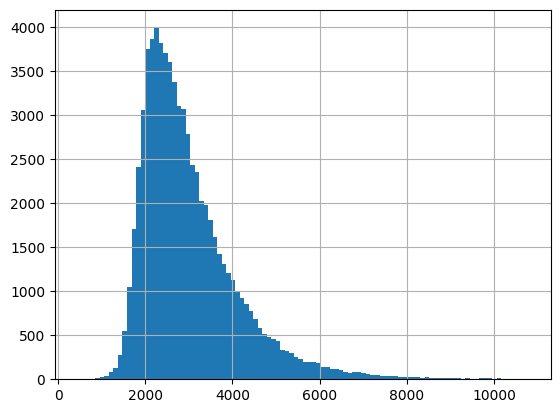

In [105]:
p4_ata_train.hist(bins=100)

<AxesSubplot: >

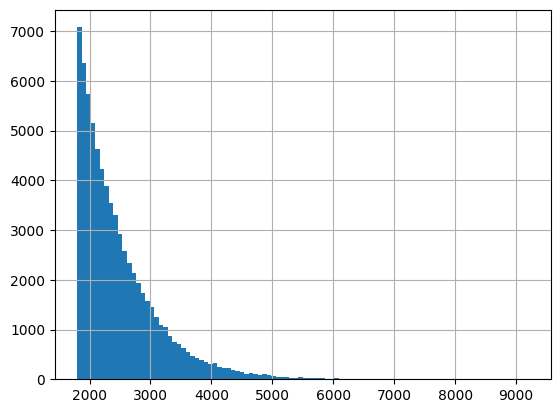

In [108]:
pd.Series(p4_eta_edd_h3_hour_train_transformed[:, 17]).hist(bins=100)

In [109]:
pd.Series(p4_ata_train_pred).hist(bins=100)

ValueError: Grouper for '100' not 1-dimensional